## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [33]:
tips_df = pd.read_csv('./tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [34]:
categorical_columns = tips_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = tips_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['sex', 'smoker', 'day', 'time']
Numerical Columns: ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [35]:
average_bill_per_day = tips_df.groupby('day')['total_bill'].mean()
print(average_bill_per_day)


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [36]:
average_tip_by_gender = tips_df.groupby('sex')['tip'].mean()
print(average_tip_by_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


### 4. According to the data, were there more customers for dinner or lunch?

In [37]:
time_count = tips_df['time'].value_counts()
print(time_count)

time
Dinner    176
Lunch      68
Name: count, dtype: int64


### 5. Based on the statistical summary, comment on the variable 'tip'

In [38]:
tip_summary = tips_df['tip'].describe()
print(tip_summary)

#Comment - Analyze the summary (mean, median, min, max) to understand the distribution of tips.

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


### 6. Find the busiest day in terms of the orders?

In [39]:
busiest_day = tips_df['day'].value_counts().idxmax()
print(f"Busiest Day: {busiest_day}")

Busiest Day: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

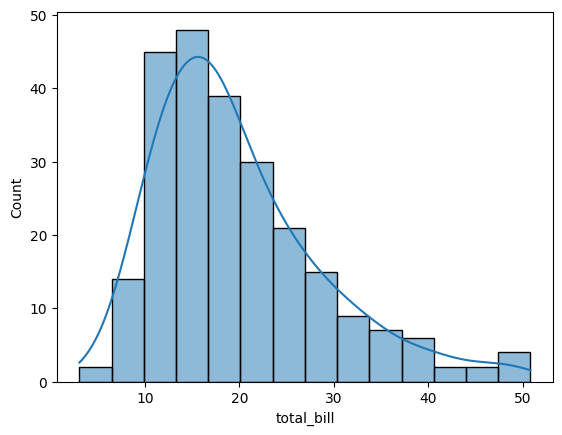

Skewness: 1.1332130376158205


In [40]:
sns.histplot(tips_df['total_bill'], kde=True)
plt.show()

skewness = tips_df['total_bill'].skew()
print(f"Skewness: {skewness}")

#Findings - Positive skewness (>0) indicates right-skewed distribution; negative skewness (<0) indicates left-skewed.


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

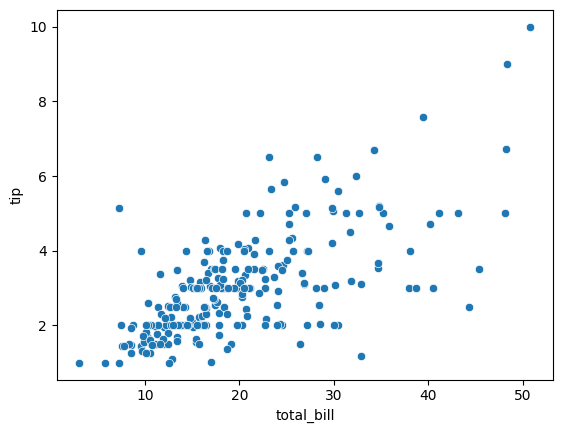

Correlation between total_bill and tip: 0.6757341092113646


In [41]:
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.show()

correlation = tips_df['total_bill'].corr(tips_df['tip'])
print(f"Correlation between total_bill and tip: {correlation}")


### 9. What is the percentage of males and females in the dataset? and display it in the plot

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


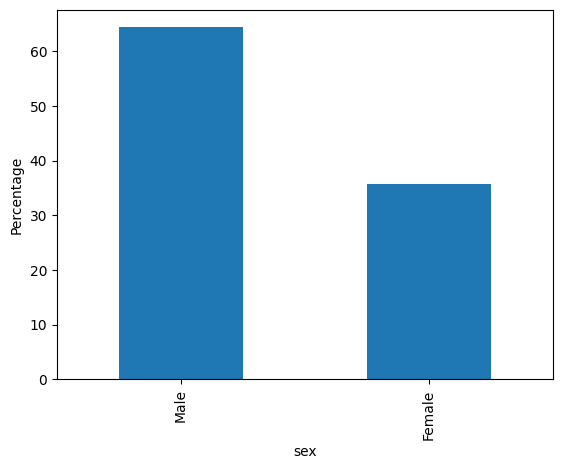

In [42]:
gender_count = tips_df['sex'].value_counts(normalize=True) * 100
print(gender_count)

gender_count.plot(kind='bar')
plt.ylabel('Percentage')
plt.show()


### 10. Compute the gender-wise count based on smoking habits and display it in the plot

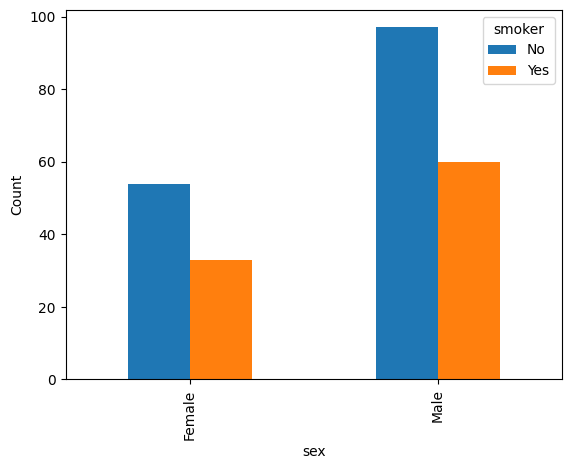

In [43]:
gender_smoker_count = tips_df.groupby(['sex', 'smoker']).size().unstack()
gender_smoker_count.plot(kind='bar')
plt.ylabel('Count')
plt.show()


### 11. Compute the average tip amount given for different days and display it in the plot.

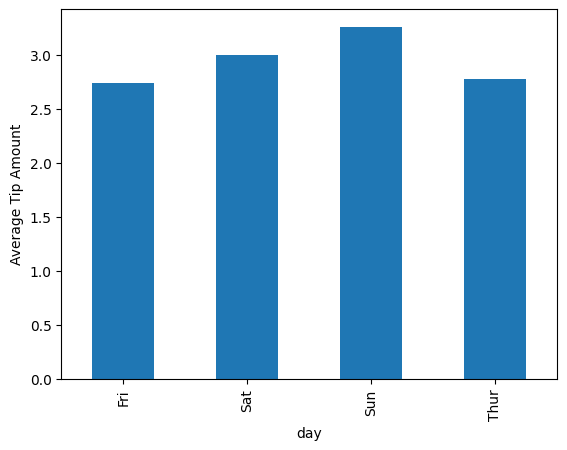

In [44]:
avg_tip_day = tips_df.groupby('day')['tip'].mean()
avg_tip_day.plot(kind='bar')
plt.ylabel('Average Tip Amount')
plt.show()


### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

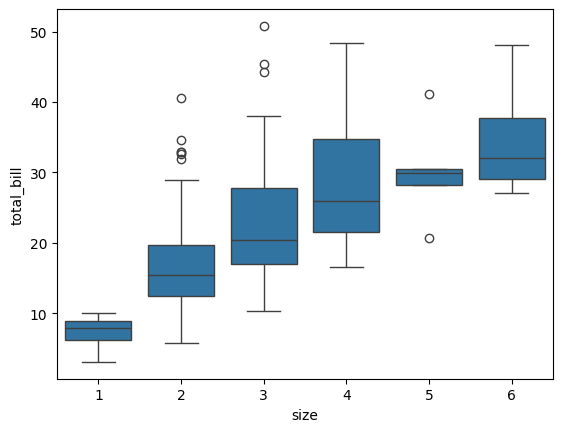

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


In [45]:
sns.boxplot(x='size', y='total_bill', data=tips_df)
plt.show()

group_size_bill_corr = tips_df.groupby('size')['total_bill'].mean()
print(group_size_bill_corr)


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

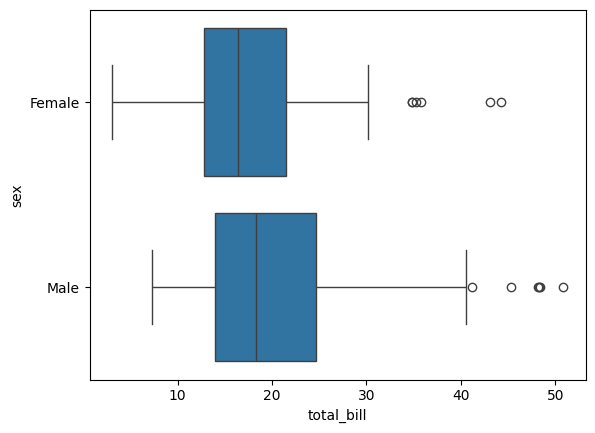

In [46]:
sns.boxplot(x='total_bill', y='sex', data=tips_df, orient='h')
plt.show()


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [47]:
max_bill = tips_df[(tips_df['day'].isin(['Sat', 'Sun'])) & (tips_df['time'].isin(['Lunch', 'Dinner']))]
max_bill_amount = max_bill.groupby(['day', 'time'])['total_bill'].max()
print(max_bill_amount)


day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64


### 15. Compute the percentage of missing values in the dataset.

In [48]:
missing_percentage = tips_df.isnull().mean() * 100
print(missing_percentage)


total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [49]:
duplicates = tips_df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
tips_df.drop_duplicates(inplace=True)


Number of duplicate records: 1


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

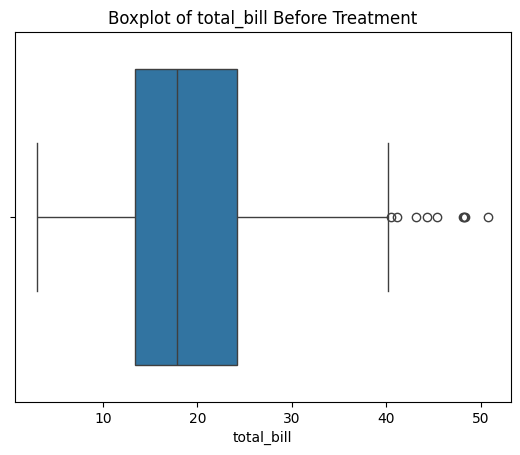

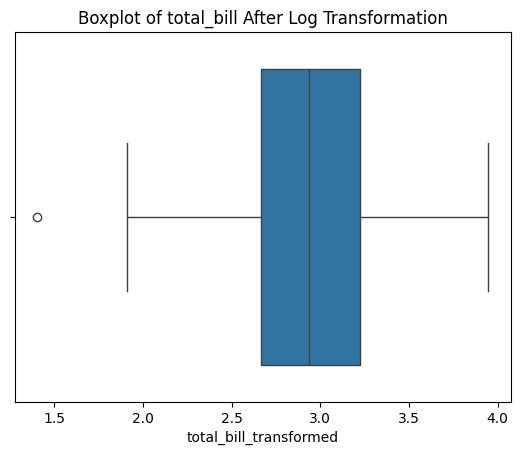

In [50]:
sns.boxplot(x=tips_df['total_bill'])
plt.title('Boxplot of total_bill Before Treatment')
plt.show()

tips_df['total_bill_transformed'] = np.log(tips_df['total_bill'] + 1)

# Boxplot after treatment
sns.boxplot(x=tips_df['total_bill_transformed'])
plt.title('Boxplot of total_bill After Log Transformation')
plt.show()


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [51]:
Q1 = tips_df['tip'].quantile(0.25)
Q3 = tips_df['tip'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = tips_df[(tips_df['tip'] < lower_bound) | (tips_df['tip'] > upper_bound)]
tips_df = tips_df[~((tips_df['tip'] < lower_bound) | (tips_df['tip'] > upper_bound))]

print(f"Outliers removed: {len(outliers)}")


Outliers removed: 8


### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [52]:
tips_encoded = pd.get_dummies(tips_df, drop_first=True)
print(tips_encoded.sample(5))


     total_bill   tip  size  total_bill_transformed  sex_Male  smoker_Yes  \
160       21.50  3.50     4                3.113515      True       False   
57        26.41  1.50     2                3.310908     False       False   
127       14.52  2.00     2                2.742130     False       False   
63        18.29  3.76     4                2.959587      True        True   
81        16.66  3.40     2                2.871302      True       False   

     day_Sat  day_Sun  day_Thur  time_Lunch  
160    False     True     False       False  
57      True    False     False       False  
127    False    False      True        True  
63      True    False     False       False  
81     False    False      True        True  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [53]:
total_bill_min = tips_df['total_bill'].min()
total_bill_max = tips_df['total_bill'].max()

tips_df['total_bill'] = 1 + (tips_df['total_bill'] - total_bill_min) / (total_bill_max - total_bill_min)
print(tips_df['total_bill'].head())


0    1.308647
1    1.161197
2    1.397783
3    1.456984
4    1.477162
Name: total_bill, dtype: float64


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [54]:
tips_df = pd.read_csv('./tips.csv')

# Encode categorical variables
tips_encoded = pd.get_dummies(tips_df, drop_first=True)

# Split X and y
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']




### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [55]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale 'total_bill' and 'size' using Min-Max Scaling
scaler = MinMaxScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared value: {r_squared}")


R-squared value: 0.29309667441267473


### Happy Learning:)